## 25 - Heat
>Map something related to heat. Focus on heat, whether it’s actual temperature or areas of intensity—like heatmaps of activity or metaphorical heat. 🔥

In [1]:
import mapping_funcs as mf
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox
import xrspatial as xrs
import xarray as xr
import matplotlib.patheffects as path_effects

ox.settings.max_query_area_size = 1e12

In [2]:
from matplotlib.font_manager import fontManager

fontManager.addfont('../../../../../fonts/HighTide/HighTide/Commercial/TTF/HighTide-Regular.ttf')
fontManager.addfont('../../../../../fonts/HighTide/HighTide/Commercial/TTF/HighTide-Bold.ttf')
fontManager.addfont('../../../../../fonts/HighTide/HighTide/Commercial/TTF/HighTide-Sans.ttf')

In [3]:
iceland = ox.geocode_to_gdf("Iceland")
aoi = iceland.loc[0,'geometry']
springs = ox.features_from_polygon(aoi,
                                   tags={
                                       "natural": ['hot spring', 'geyser', 'volcano']
                                   })
sauna = ox.features_from_polygon(aoi,
                                 tags={'leisure': 'sauna'})
coast = ox.features_from_polygon(aoi,
                                 tags={'natural': 'coastline'})

In [4]:
dem = mf.DEM.get_copernicus_dem(aoi.envelope,
                                res=90,
                                rprj=False,
                                interp=False)

coarse_dem = dem.coarsen({'x': 5,
                          'y': 5},
                         boundary='trim').median(skipna=True)

hs = (xrs.hillshade(
    xr.where((coarse_dem<=0.5) | (coarse_dem.isnull()),
             np.nan,
             coarse_dem)
    ).compute())


c:\Users\s1759665\AppData\Local\miniforge-pypy3\envs\mapping\Lib\site-packages\dask\utils.py:78: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)


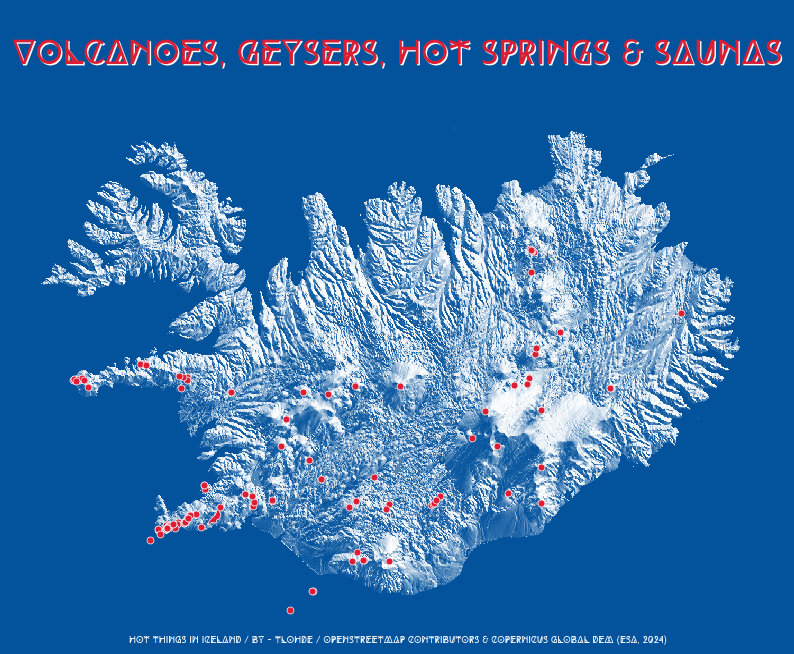

In [5]:
cmap = LinearSegmentedColormap.from_list(
    'special', [(1,1,1,1),
                '#02529C']
)
fig, ax = plt.subplots(figsize=[10,10])

hs.plot(ax=ax, cmap=cmap, add_colorbar=False)

springs.plot(color='#DC1E35',
             edgecolor='w',
             linewidth=0.5,
             markersize=25,
             zorder=2,
             ax=ax)

sauna.plot(color='#DC1E35',
           edgecolor='w',
           linewidth=0.5,
           markersize=25,
           zorder=2,
           ax=ax)

ax.set_axis_off()

minx, miny, maxx, maxy = aoi.bounds

ax.set(xlim=(minx, maxx),
       ylim=(miny, maxy))

fig.patch.set_facecolor('#02529C')

ax.set_title('Volcanoes, Geysers, Hot Springs & Saunas',
             color='#DC1E35',
             y=0.9,
             path_effects=[path_effects.withSimplePatchShadow(offset=(1,-1),
                                                                      shadow_rgbFace='w',
                                                                      alpha=1)],
             font_properties={
                 'family': 'High Tide',
                 'size': 25})

ax.annotate('hot things in iceland / by - tlohde / OpenStreetMap contributors & Copernicus Global DEM (ESA, 2024)',
            xy=(0.5,0),
            ha='center',
            color='w',
            xycoords='axes fraction',
            font='High Tide',
            fontsize=7)

fig.savefig('day25.png', dpi=300, bbox_inches='tight')